In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from scipy.stats import zscore

In [2]:
# Charger les données
df = pd.read_csv("data_finale2.csv")

In [4]:
# Vérifier les doublons dans toutes les colonnes
doublons = df[df.duplicated()]

# Afficher le nombre de doublons
print(f"Nombre de doublons : {doublons.shape[0]}")

Nombre de doublons : 0


In [135]:
print(df.columns)

Index(['id', 'age', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')


In [136]:
# Séparer les données numériques et catégorielles
numerical_features = ['age', 'Medu', 'Fedu', 'famrel','studytime','traveltime', 'failures','freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
categorical_features = ['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'romantic','reason','guardian','schoolsup','famsup','paid','activities','higher','internet']
print(numerical_features)
print(categorical_features)

['age', 'Medu', 'Fedu', 'famrel', 'studytime', 'traveltime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'romantic', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet']


In [137]:
# Aperçu des données
print("--- Informations sur les données numériques ---")
print(df[numerical_features].head())

--- Informations sur les données numériques ---
   age  Medu  Fedu  famrel  studytime  traveltime  failures  freetime  goout  \
0   17     2     3       5          4           1         0         4      7   
1   18     3     4       4          5           4         1         4      5   
2   15     4     1       2          1           3         3         3     10   
3   17     1     0       3          1           4         2         4      7   
4   17     2     4       3          2           3         2         4      5   

   Dalc  Walc  health  absences    G3  
0     2     1       5         8  14.9  
1     3     4       5        16   7.2  
2     3     3       4        20   2.9  
3     5     4       4        28   1.6  
4     5     4       4        20   8.8  


In [110]:
print(df[numerical_features].describe())

               age         Medu         Fedu       famrel    studytime  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     16.485200     1.974400     2.033000     3.451600     3.112000   
std       1.127136     1.416244     1.402535     1.278743     2.469064   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      15.000000     1.000000     1.000000     3.000000     1.000000   
50%      16.000000     2.000000     2.000000     4.000000     2.000000   
75%      18.000000     3.000000     3.000000     5.000000     5.000000   
max      18.000000     4.000000     4.000000     5.000000    10.000000   

        traveltime     failures     freetime       goout         Dalc  \
count  5000.000000  5000.000000  5000.000000  5000.00000  5000.000000   
mean      2.599600     1.868600     3.268200     5.28840     3.393600   
std       1.077735     1.342123     1.027268     1.70933     1.594737   
min       1.000000     0.000000     1.000

In [111]:
print(df[numerical_features].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         5000 non-null   int64  
 1   Medu        5000 non-null   int64  
 2   Fedu        5000 non-null   int64  
 3   famrel      5000 non-null   int64  
 4   studytime   5000 non-null   int64  
 5   traveltime  5000 non-null   int64  
 6   failures    5000 non-null   int64  
 7   freetime    5000 non-null   int64  
 8   goout       5000 non-null   int64  
 9   Dalc        5000 non-null   int64  
 10  Walc        5000 non-null   int64  
 11  health      5000 non-null   int64  
 12  absences    5000 non-null   int64  
 13  G3          5000 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [112]:
print("--- Informations sur les données catégorielles ---")
print(df[categorical_features].head())

--- Informations sur les données catégorielles ---
  sex famsize Pstatus      Mjob      Fjob romantic      reason guardian  \
0   M     GT3       T   at_home   at_home       no       other   mother   
1   M     GT3       A     other     other       no       other   father   
2   M     GT3       A  services  services       no  reputation   father   
3   M     LE3       A   at_home   teacher       no        home   mother   
4   F     LE3       T   teacher    health      yes        home    other   

  schoolsup famsup paid activities higher internet  
0       yes     no  yes        yes    yes      yes  
1       yes    yes   no        yes    yes       no  
2       yes    yes  yes        yes     no       no  
3       yes    yes   no         no    yes       no  
4       yes    yes  yes         no     no       no  


In [113]:
print(df[categorical_features].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         5000 non-null   object
 1   famsize     5000 non-null   object
 2   Pstatus     5000 non-null   object
 3   Mjob        5000 non-null   object
 4   Fjob        5000 non-null   object
 5   romantic    5000 non-null   object
 6   reason      5000 non-null   object
 7   guardian    5000 non-null   object
 8   schoolsup   5000 non-null   object
 9   famsup      5000 non-null   object
 10  paid        5000 non-null   object
 11  activities  5000 non-null   object
 12  higher      5000 non-null   object
 13  internet    5000 non-null   object
dtypes: object(14)
memory usage: 547.0+ KB
None


In [114]:
print("--- Informations sur les données catégorielles ---")
print(df[categorical_features].describe())

--- Informations sur les données catégorielles ---
         sex famsize Pstatus   Mjob   Fjob romantic reason guardian schoolsup  \
count   5000    5000    5000   5000   5000     5000   5000     5000      5000   
unique     2       2       2      5      5        2      4        3         2   
top        M     GT3       A  other  other       no  other   father       yes   
freq    2509    2501    2522   1096   1041     2545   1277     1734      3600   

       famsup  paid activities higher internet  
count    5000  5000       5000   5000     5000  
unique      2     2          2      2        2  
top       yes   yes        yes     no       no  
freq     3034  2777       2504   2945     3538  


In [115]:
#detection des doublons
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


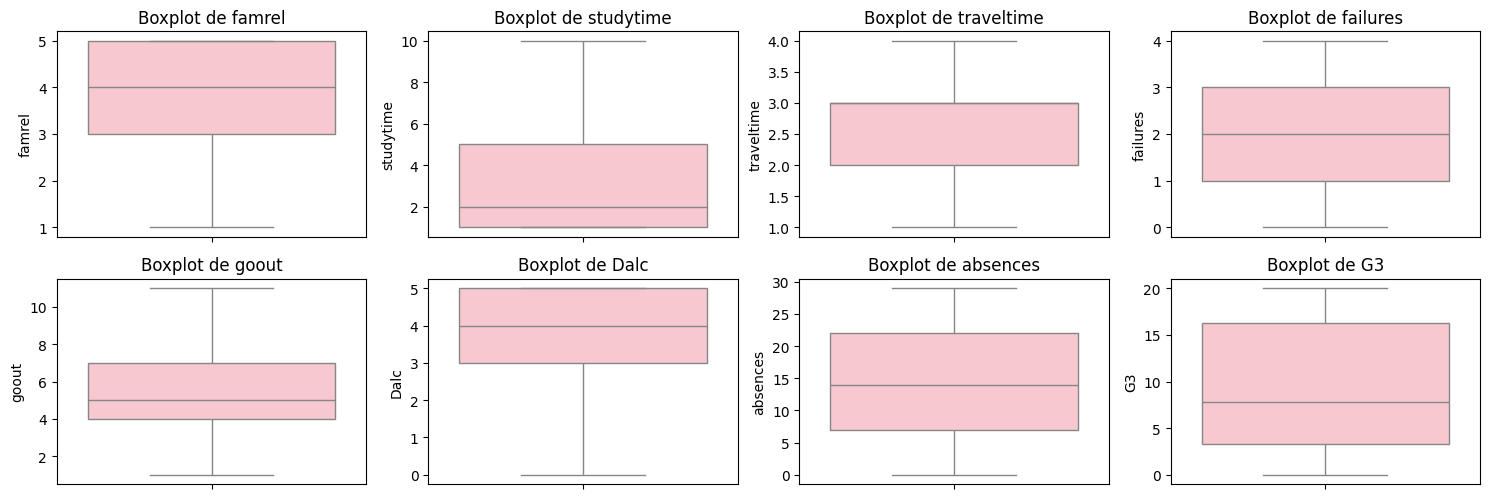

In [116]:
# Boxplots pour les variables numériques
numerical_featuresb = [ 'famrel','studytime','traveltime', 'failures', 'goout', 'Dalc', 'absences', 'G3']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_featuresb, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color='pink')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [117]:
# Supprimer la colonne 'address' du DataFrame
df.drop(columns=['address'], inplace=True)

In [118]:
# Création d'une colonne "result" qui vaut 1 si "G3" 
#     est supérieure ou égale à 10, sinon 0
df["result"] = (df["G3"] >= 10).astype(int) 
counts = df["result"].value_counts()
print("--- Repartition des etudiants avant ---")
print(f"Nombre d'étudiants avec 1 : {counts[1]}")
print(f"Nombre d'étudiants avec 0 : {counts[0]}")

--- Repartition des etudiants avant ---
Nombre d'étudiants avec 1 : 1989
Nombre d'étudiants avec 0 : 3011


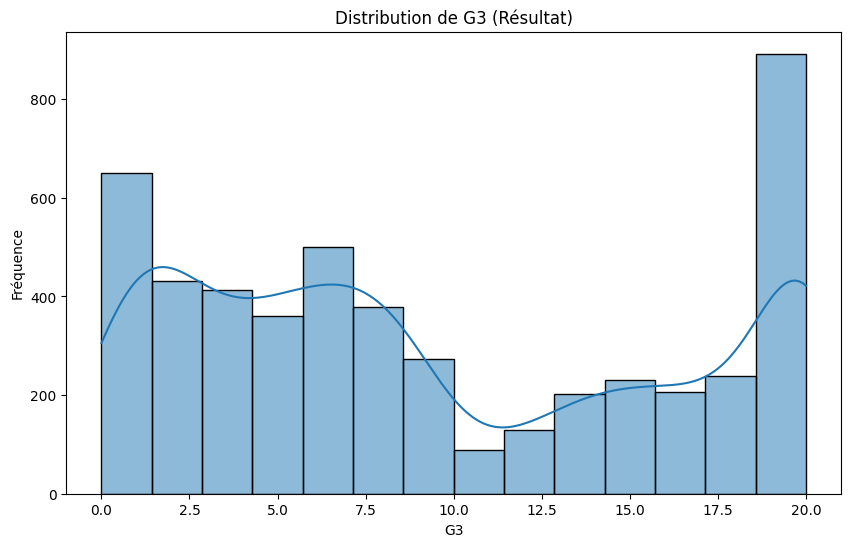

In [119]:
# Visualisation de la distribution de 'G3' (le résultat)
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], kde=True)
plt.title('Distribution de G3 (Résultat)')
plt.xlabel('G3')
plt.ylabel('Fréquence')
plt.show()

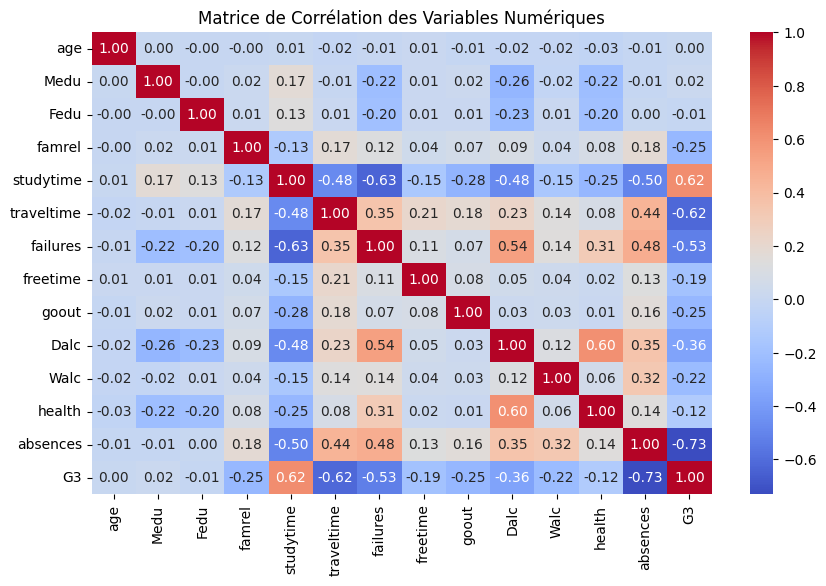

In [120]:
# Visualisation des corrélations entre les variables numériques et G3
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\1859562480.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traveltime', y='absences', data=df, palette="YlOrRd")
C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\1859562480.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, palette="Greens", errorbar=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\1859562480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='failures', y='G3', data=df, palette="Reds")


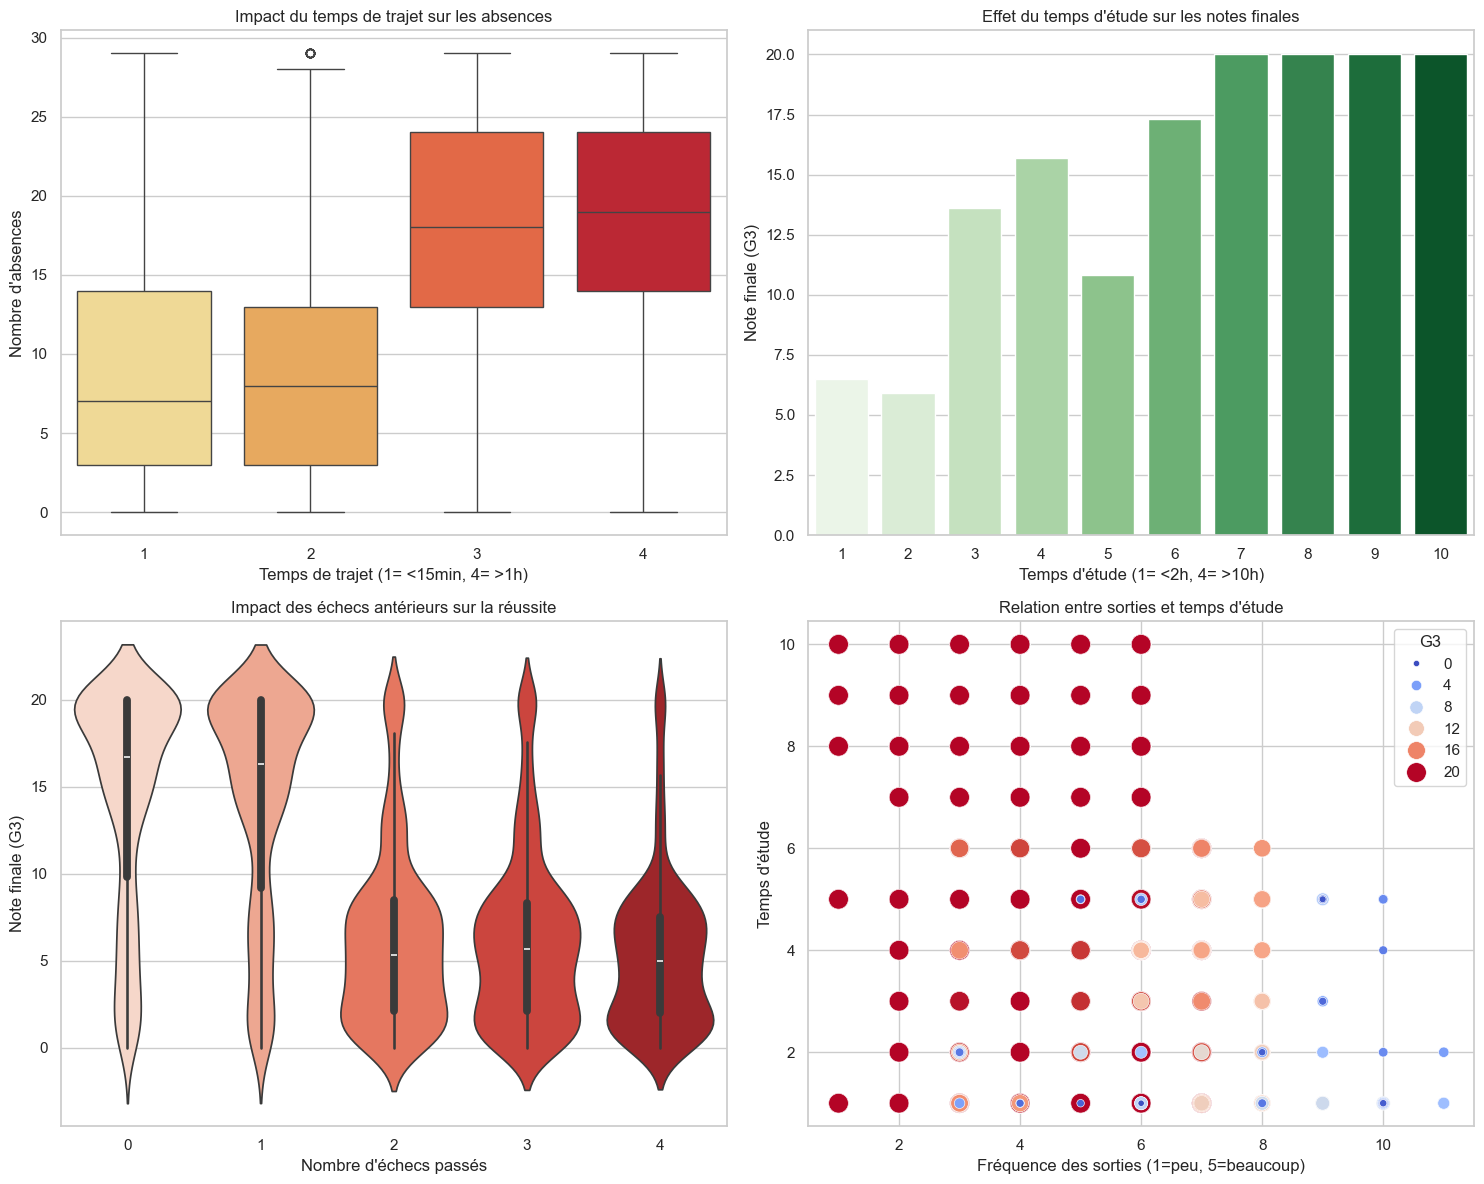

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# 1. Relation entre traveltime et absences
plt.subplot(2, 2, 1)
sns.boxplot(x='traveltime', y='absences', data=df, palette="YlOrRd")
plt.title("Impact du temps de trajet sur les absences")
plt.xlabel("Temps de trajet (1= <15min, 4= >1h)")
plt.ylabel("Nombre d'absences")

# 2. Relation entre studytime et notes (G3)
plt.subplot(2, 2, 2)
sns.barplot(x='studytime', y='G3', data=df, palette="Greens", errorbar=None)
plt.title("Effet du temps d'étude sur les notes finales")
plt.xlabel("Temps d'étude (1= <2h, 4= >10h)")
plt.ylabel("Note finale (G3)")

# 3. Relation entre failures et réussite (G3)
plt.subplot(2, 2, 3)
sns.violinplot(x='failures', y='G3', data=df, palette="Reds")
plt.title("Impact des échecs antérieurs sur la réussite")
plt.xlabel("Nombre d'échecs passés")
plt.ylabel("Note finale (G3)")

# 4. Relation entre goout et studytime
plt.subplot(2, 2, 4)
sns.scatterplot(x='goout', y='studytime', data=df, hue='G3', 
                palette="coolwarm", size='G3', sizes=(20, 200))
plt.title("Relation entre sorties et temps d'étude")
plt.xlabel("Fréquence des sorties (1=peu, 5=beaucoup)")
plt.ylabel("Temps d'étude")

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\1859562480.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traveltime', y='absences', data=df, palette="YlOrRd")
C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\1859562480.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, palette="Greens", errorbar=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\1859562480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='failures', y='G3', data=df, palette="Reds")


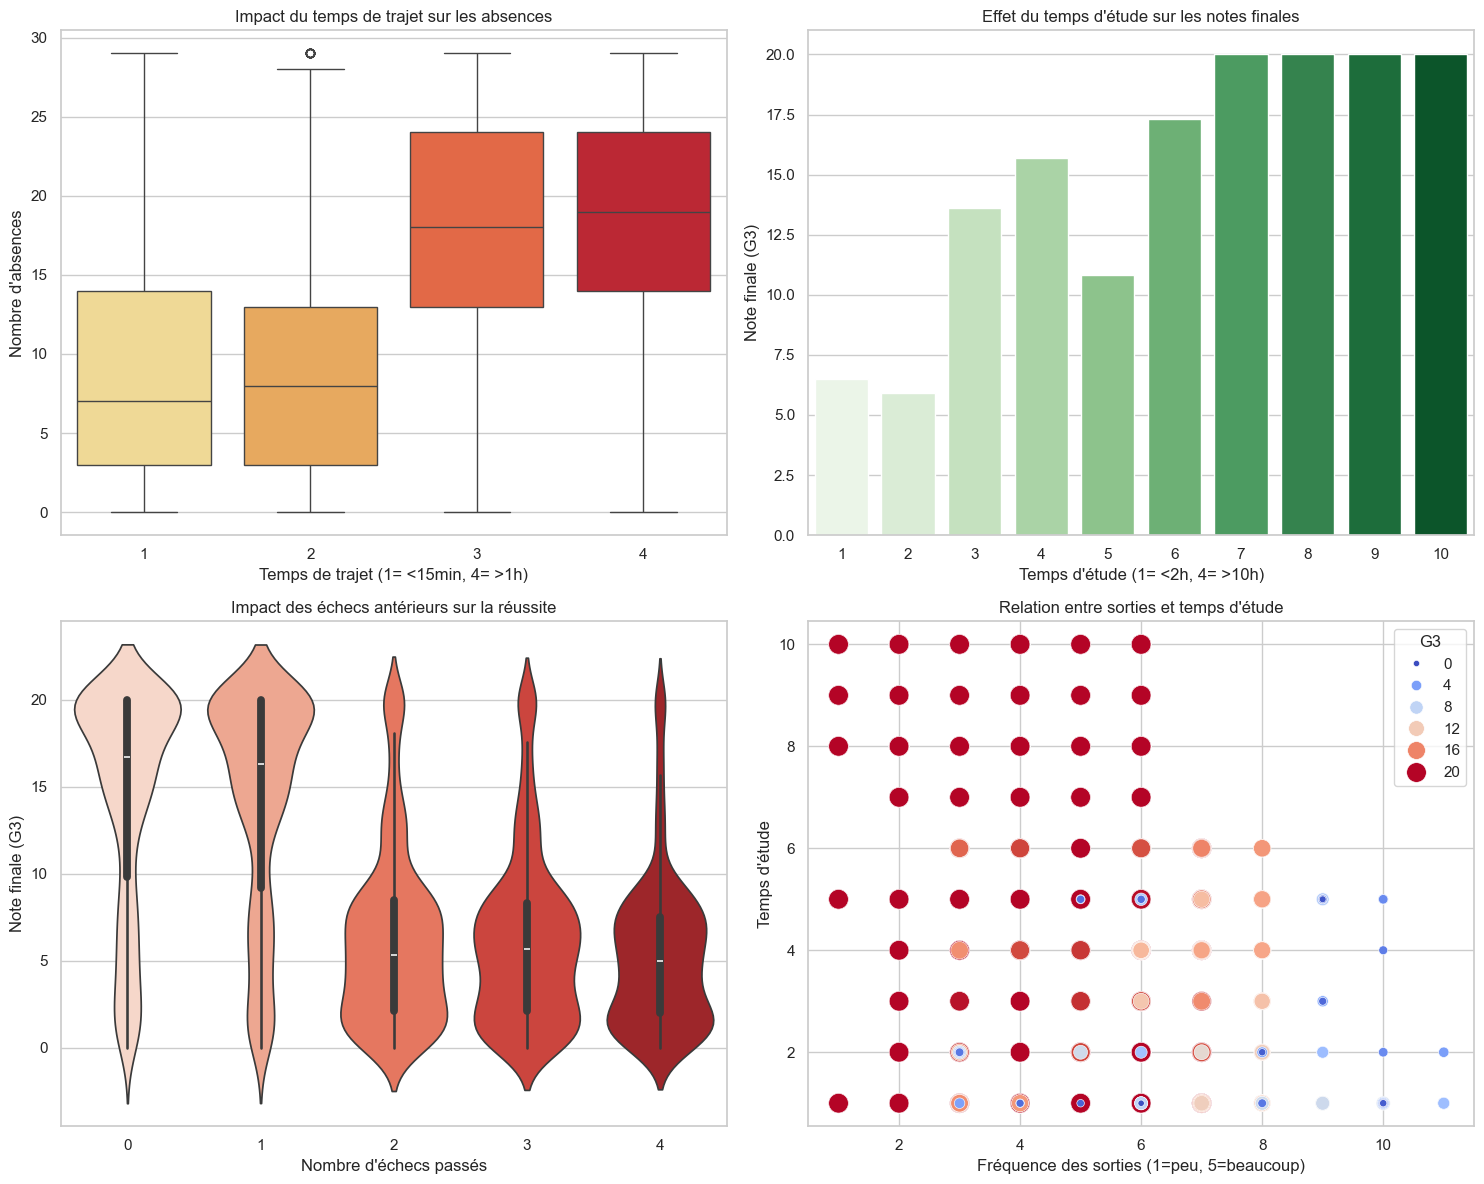

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# 1. Relation entre traveltime et absences
plt.subplot(2, 2, 1)
sns.boxplot(x='traveltime', y='absences', data=df, palette="YlOrRd")
plt.title("Impact du temps de trajet sur les absences")
plt.xlabel("Temps de trajet (1= <15min, 4= >1h)")
plt.ylabel("Nombre d'absences")

# 2. Relation entre studytime et notes (G3)
plt.subplot(2, 2, 2)
sns.barplot(x='studytime', y='G3', data=df, palette="Greens", errorbar=None)
plt.title("Effet du temps d'étude sur les notes finales")
plt.xlabel("Temps d'étude (1= <2h, 4= >10h)")
plt.ylabel("Note finale (G3)")

# 3. Relation entre failures et réussite (G3)
plt.subplot(2, 2, 3)
sns.violinplot(x='failures', y='G3', data=df, palette="Reds")
plt.title("Impact des échecs antérieurs sur la réussite")
plt.xlabel("Nombre d'échecs passés")
plt.ylabel("Note finale (G3)")

# 4. Relation entre goout et studytime
plt.subplot(2, 2, 4)
sns.scatterplot(x='goout', y='studytime', data=df, hue='G3', 
                palette="coolwarm", size='G3', sizes=(20, 200))
plt.title("Relation entre sorties et temps d'étude")
plt.xlabel("Fréquence des sorties (1=peu, 5=beaucoup)")
plt.ylabel("Temps d'étude")

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\4095311048.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="G3", data=df, palette=palettes[i-1], errorbar=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\4095311048.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="G3", data=df, palette=palettes[i-1], errorbar=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13276\4095311048.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="G3", data=df, palette=palettes[i-1], errorbar=None)
C:\Users\DELL\AppData\

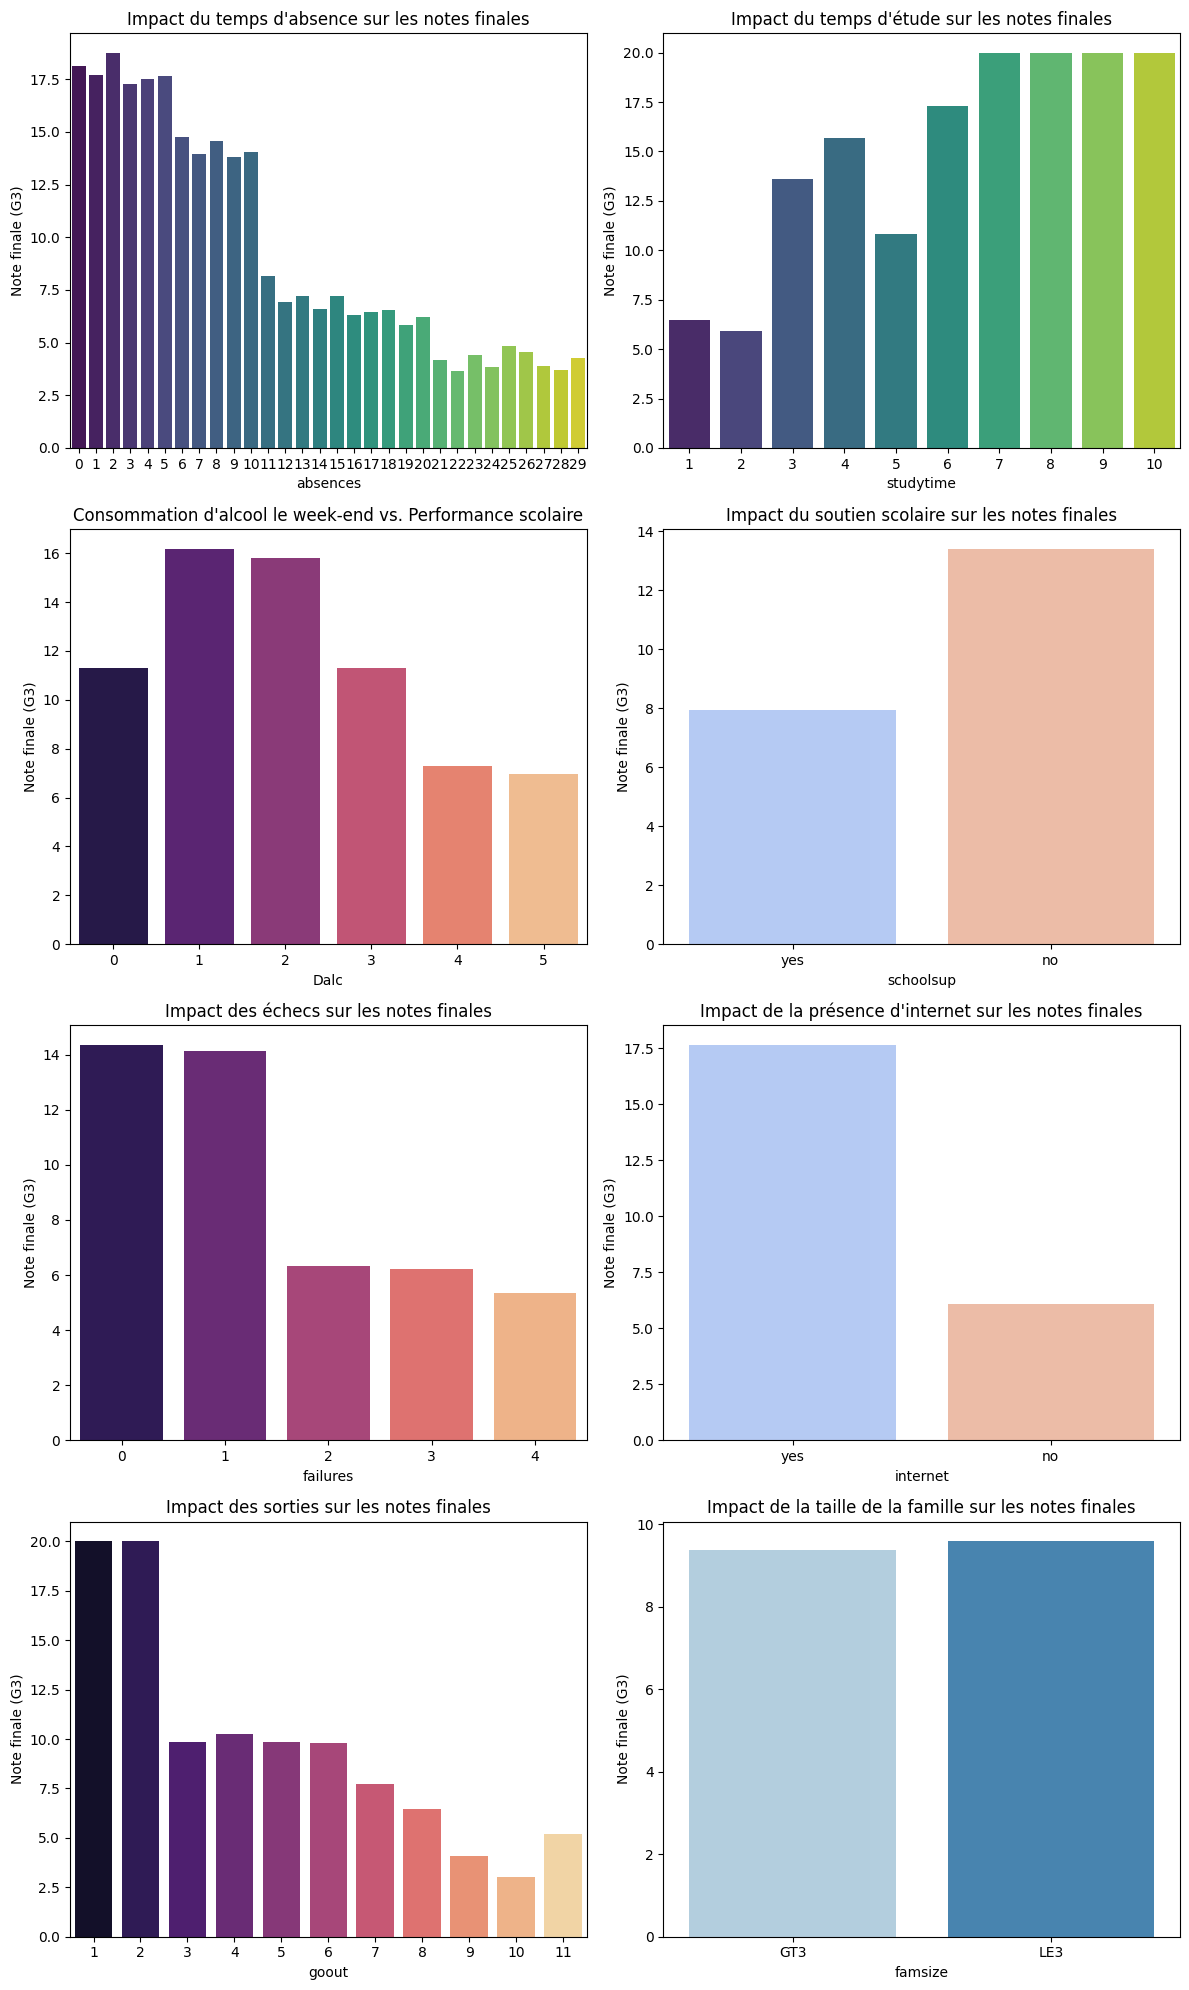

In [121]:
# Assuming df is your DataFrame containing the data
# Make sure it has columns named exactly as your variables list

# List of variables to visualize with their titles
variables = [
    ("absences", "Impact du temps d'absence sur les notes finales"),
    ("studytime", "Impact du temps d'étude sur les notes finales"),
    ("Dalc", "Consommation d'alcool le week-end vs. Performance scolaire"),
    ("schoolsup", "Impact du soutien scolaire sur les notes finales"),
    ("failures", "Impact des échecs sur les notes finales"),
    ("internet", "Impact de la présence d'internet sur les notes finales"),
    ("goout", "Impact des sorties sur les notes finales"),
]

# Palette used for the plots
palettes = ["viridis", "viridis", "magma", "coolwarm", "magma", "coolwarm", "magma", "Blues"]

# Create the figure
plt.figure(figsize=(12, 20))

# Create plots in a loop
for i, (var, title) in enumerate(variables, 1):
    plt.subplot(4, 2, i)  # Create a 4x2 grid of subplots
    
    # Make sure to pass the actual DataFrame (df) to the data parameter
    sns.barplot(x=var, y="G3", data=df, palette=palettes[i-1], errorbar=None)
    
    plt.title(title)
    plt.xlabel(var)
    plt.ylabel("Note finale (G3)")

plt.tight_layout()
plt.show()

In [71]:
# Encodage des données catégorielles avec LabelEncoder
encoder = LabelEncoder()
for col in categorical_features:
    df[col + "_e"] = encoder.fit_transform(df[col])
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"Correspondance entre catégories et nombres encodés pour {col}:")
    for cat, num in mapping.items():
        print(f"{cat} → {num}")

Correspondance entre catégories et nombres encodés pour sex:
F → 0
M → 1
Correspondance entre catégories et nombres encodés pour famsize:
GT3 → 0
LE3 → 1
Correspondance entre catégories et nombres encodés pour Pstatus:
A → 0
T → 1
Correspondance entre catégories et nombres encodés pour Mjob:
at_home → 0
health → 1
other → 2
services → 3
teacher → 4
Correspondance entre catégories et nombres encodés pour Fjob:
at_home → 0
health → 1
other → 2
services → 3
teacher → 4
Correspondance entre catégories et nombres encodés pour romantic:
no → 0
yes → 1
Correspondance entre catégories et nombres encodés pour reason:
course → 0
home → 1
other → 2
reputation → 3
Correspondance entre catégories et nombres encodés pour guardian:
father → 0
mother → 1
other → 2
Correspondance entre catégories et nombres encodés pour schoolsup:
no → 0
yes → 1
Correspondance entre catégories et nombres encodés pour famsup:
no → 0
yes → 1
Correspondance entre catégories et nombres encodés pour paid:
no → 0
yes → 1
Cor

In [49]:
from imblearn.over_sampling import SMOTE

# Séparer les données et la cible
X = df.drop(columns=['result'])
y = df['result']

# Appliquer l'encodeur aux colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

# Appliquer SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("--- Repartition des etudiants apres ---")
# Vérifier la répartition des classes après SMOTE
print(y_resampled.value_counts())


--- Repartition des etudiants apres ---
result
1    3011
0    3011
Name: count, dtype: int64


In [24]:
# Sauvegarde du DataFrame dans un fichier CSV
df.to_csv('data_finale_finale.csv', index=False)